In [354]:
import numpy as np
import matplotlib.pyplot as plt

<h3>[Problem 1] Number of wheat on a 2 x 2 square chess board<h3>


In [355]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])

small_board_ndarray = np.array(small_board_list).reshape(2, 2)

In [356]:
print("Chess board information: \n{}".format(small_board_ndarray))

Chess board information: 
[[1 2]
 [4 8]]


<h3>[Problem 2] Expansion to n × m mass<h3>

In [357]:
def create_nxm_chessboard(n, m):
    """
    A function that create a ndarray containing the number of wheat on an n x m chess board.
    Parameter
    --------------
    n: int
        number of rows (n > 0)
    m: int
        number of columns (m > 0)
    Returns
    --------------
    An array: ndarray shape n x m
    """

    if (n < 1 or m < 1):
        print("Invalid input")
        return

    board_list = [1]
    for _ in range(n * m - 1):
        board_list.append(2 * board_list[-1])
    
    return np.array(board_list).reshape(n, m)

In [358]:
n = 8
m = 8

chessboard_8x8_array = create_nxm_chessboard(n, m)

In [359]:
print("Chess board information: \n{}".format(chessboard_8x8_array))

Chess board information: 
[[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04]
 [6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
  1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06]
 [1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
  2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]
 [4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
  6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]
 [1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
  1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]
 [2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
  4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16]
 [7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
  1.15292150e+18 2.30584301e+18 4.611

<h3>[Problem 3] Total number of wheat<h3>

In [360]:
total_wheat_8x8 = chessboard_8x8_array.sum()
mean_wheat_column_8x8_array = chessboard_8x8_array.mean(axis=0)

In [361]:
print("total wheat in 8x8 chessboard: {}".format(total_wheat_8x8))
print("average wheat in each column in 8x8 chessboard: {}".format(mean_wheat_column_8x8_array))

total wheat in 8x8 chessboard: 1.8446744073709552e+19
average wheat in each column in 8x8 chessboard: [9.04252160e+15 1.80850432e+16 3.61700864e+16 7.23401728e+16
 1.44680346e+17 2.89360691e+17 5.78721383e+17 1.15744277e+18]


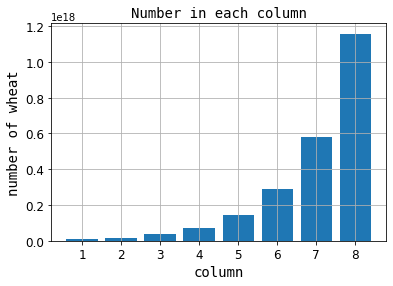

In [362]:
%matplotlib inline
font = {'family': 'monospace',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }
plt.grid()
plt.xlabel("column", fontdict=font)
plt.ylabel("number of wheat", fontdict=font)
plt.title("Number in each column", fontdict=font)
plt.tick_params(labelsize=12)
plt.bar(np.arange(1, m + 1), mean_wheat_column_8x8_array)
plt.show()

<h3>[Problem 4] Heat map of the number of wheat<h3>

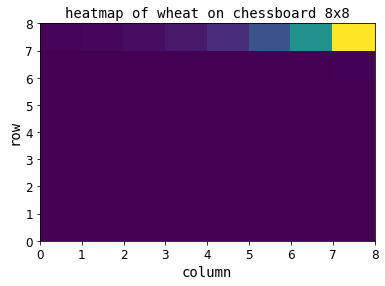

In [363]:
plt.xlabel("column", fontdict = font)
plt.ylabel("row", fontdict = font)
plt.title("heatmap of wheat on chessboard 8x8", fontdict = font)
plt.tick_params(labelsize=12)
plt.pcolor(chessboard_8x8_array)
plt.show()

<h3>[Problem 5] How many times is the second half as long as the first half?<h3>

In [364]:
print("The second half equal {} times the first half".format(
                                chessboard_8x8_array[4:7, :].sum() / chessboard_8x8_array[0:3, :].sum()))

The second half equal 4294967296.0 times the first half


<h3>[Problem 6] Expansion to n × m mass by another calculation method<h3>

In [365]:
def create_nxm_chessboard_append(n, m):
    """
    A function that create a ndarray containing the number of wheat on an n x m chess board using np.append.
    Parameter
    --------------
    n: int
        number of rows (n > 0)
    m: int
        number of columns (m > 0)
    Returns
    --------------
    An array: ndarray shape n x m
    """

    if (n < 1 or m < 1):
        print("Invalid input")
        return

    board_array = np.array([1]).astype(np.uint64)
    for _ in range(n * m - 1):
        board_array = np.append(board_array, 2 * board_array[-1])
    
    return board_array.reshape(n, m)

In [366]:
def create_nxm_chessboard_broadcast(n, m):
    """
    A function that create a ndarray containing the number of wheat on an n x m chess board using broadcast.
    Parameter
    --------------
    n: int
        number of rows (n > 0)
    m: int
        number of columns (m > 0)
    Returns
    --------------
    An array: ndarray shape n x m
    """

    if (n < 1 or m < 1):
        print("Invalid input")
        return

    indices_of_squares = np.arange(n * m).astype(np.uint64)
    board_array = 2**indices_of_squares
    
    return board_array.reshape(n, m)

In [367]:
print("Chess board information using np.append: \n{}".format(create_nxm_chessboard_append(n, m)))
print("Chess board information using broadcast: \n{}".format(create_nxm_chessboard_broadcast(n, m)))

Chess board information using np.append: 
[[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04]
 [6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
  1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06]
 [1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
  2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]
 [4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
  6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]
 [1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
  1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]
 [2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
  4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16]
 [7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
  1.15292150e+18 2.30

<h3>[Problem 7] Comparing calculation times<h3>

In [368]:
%%timeit
create_nxm_chessboard(n, m) #Function 1

12.2 µs ± 265 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [369]:
%%timeit
create_nxm_chessboard_append(m, n) #Function 2

330 µs ± 2.84 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [370]:
%%timeit
create_nxm_chessboard_broadcast(m, n) #Function 3

3.14 µs ± 20.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


<h4>The execution time Function 3 < Function 1 < Function 2. The time stability of every execution Function 2 > Function 3 > Function 1 <h4>